In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

import numpy

numpy.set_printoptions(threshold=sys.maxsize)

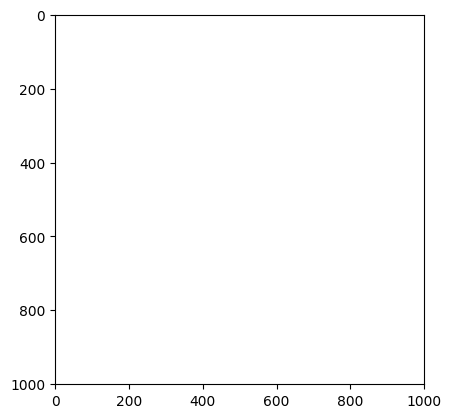

In [3]:
data = np.ones((1001, 1001))
plt.imshow(data, cmap="gray", vmin=0, vmax=1)

In [4]:
import cubed
import cubed.array_api as xp

In [5]:
rechunk_shapes = (tuple([1001, 1001]), (38, 376), (5, 146))
shape, source_chunks, target_chunks = rechunk_shapes

spec = cubed.Spec(allowed_mem=8000000 / 10)
a = xp.ones(shape, chunks=source_chunks, spec=spec)
b = a.rechunk(target_chunks)
plan = b.plan()
print(
    f"plan: num_stages: {plan.num_stages}, num_tasks: {plan.num_tasks}, max_projected_mem: {plan.max_projected_mem}"
)

_rechunk_plan 0 ((38, 376), (15, 376), (15, 1001))
_rechunk copy_chunks=(38, 376), target_chunks=(15, 376)
_rechunk copy_chunks=(15, 1001), target_chunks=(5, 146)
plan: num_stages: 3, num_tasks: 150, max_projected_mem: 571528


In [6]:
# rechunker comparison
# seems to be a problem too - since read chunks do not evenly slice int chunks
# but this is OK in rechunker, since int is *not* materialized as zarr (e.g. when running with dask)
from cubed.vendor.rechunker.algorithm import rechunking_plan

stages = rechunking_plan(
    shape, source_chunks, target_chunks, a.dtype.itemsize, max_mem=spec.allowed_mem / 4
)
stages

((38, 376), (20, 376), (20, 1001))

In [7]:
b_ = b.compute()

array-001 selection: out_coords=(0, 0), sel=(slice(0, 38, None), slice(0, 376, None))array-001 selection: out_coords=(0, 1), sel=(slice(0, 38, None), slice(376, 752, None))
array-001 selection: out_coords=(0, 1), sel=(slice(0, 38, None), slice(376, 752, None))

array-001 selection: out_coords=(0, 0), sel=(slice(0, 38, None), slice(0, 376, None))
array-001 selection: out_coords=(0, 2), sel=(slice(0, 38, None), slice(752, 1001, None))
array-001 selection: out_coords=(0, 2), sel=(slice(0, 38, None), slice(752, 1001, None))
array-001 selection: out_coords=(1, 0), sel=(slice(38, 76, None), slice(0, 376, None))
array-001 selection: out_coords=(1, 0), sel=(slice(38, 76, None), slice(0, 376, None))
array-001 selection: out_coords=(1, 1), sel=(slice(38, 76, None), slice(376, 752, None))
array-001 selection: out_coords=(1, 1), sel=(slice(38, 76, None), slice(376, 752, None))
array-001 selection: out_coords=(1, 2), sel=(slice(38, 76, None), slice(752, 1001, None))
array-001 selection: out_coords=

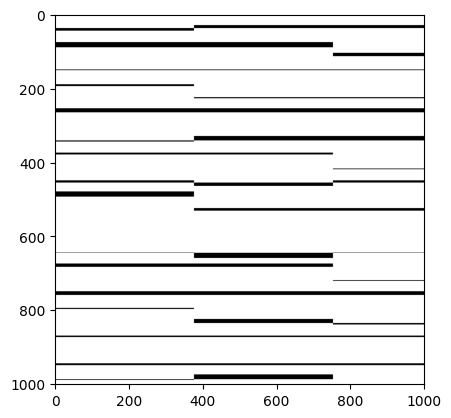

In [8]:
plt.imshow(b_, cmap="gray", vmin=0, vmax=1)

In [9]:
# what indices do zeros appear at?
np.nonzero(b_[:, 0] == 0)

(array([ 38,  39,  40,  41,  42,  43,  44,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89, 150, 151, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 342, 343, 344, 375, 376, 377, 378, 379,
        450, 451, 452, 453, 454, 455, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 645, 684, 685, 686, 687, 688,
        689, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 798, 799,
        800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 870, 871, 872,
        873, 945, 946, 947, 948, 949, 975, 976, 977, 978, 979, 980, 981,
        982, 983, 984, 985, 986, 987]),)

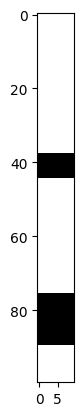

In [10]:
plt.imshow(b_[:100, :10], cmap="gray", vmin=0, vmax=1)

In [11]:
b_[:100, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
b.visualize(engine="cytoscape")